In [ ]:
!wget https://gist.githubusercontent.com/a8dx/7e550680f7ea6a68f20da00e21d7ce9b/raw/5f88f425bb362f8e200456fb8181ecb0a8fd55d6/US_County_Boundingboxes.csv

--2023-03-30 17:41:53--  https://gist.githubusercontent.com/a8dx/7e550680f7ea6a68f20da00e21d7ce9b/raw/5f88f425bb362f8e200456fb8181ecb0a8fd55d6/US_County_Boundingboxes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 342866 (335K) [text/plain]
Saving to: ‘US_County_Boundingboxes.csv’

US_County_Boundingb 100%[===================>] 334.83K  --.-KB/s    in 0.01s   

2023-03-30 17:41:53 (27.6 MB/s) - ‘US_County_Boundingboxes.csv’ saved [342866/342866]



In [ ]:
!wget https://gist.githubusercontent.com/a8dx/2340f9527af64f8ef8439366de981168/raw/81d876daea10eab5c2675811c39bcd18a79a9212/US_State_Bounding_Boxes.csv

--2023-03-30 17:41:54--  https://gist.githubusercontent.com/a8dx/2340f9527af64f8ef8439366de981168/raw/81d876daea10eab5c2675811c39bcd18a79a9212/US_State_Bounding_Boxes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3953 (3.9K) [text/plain]
Saving to: ‘US_State_Bounding_Boxes.csv’

US_State_Bounding_B 100%[===================>]   3.86K  --.-KB/s    in 0s      

2023-03-30 17:41:54 (64.4 MB/s) - ‘US_State_Bounding_Boxes.csv’ saved [3953/3953]



In [ ]:
boundingBox = pd.read_csv('US_County_Boundingboxes.csv')
xmin, ymin, xmax, ymax = boundingBox[boundingBox.COUNTY_NAME=='Dallas'].xmin.min(), boundingBox [boundingBox.COUNTY_NAME=='Dallas'].ymin.min(), boundingBox [boundingBox.COUNTY_NAME=='Dallas'].xmax.max(), boundingBox [boundingBox.COUNTY_NAME=='Dallas'].ymax.max()





In [ ]:
boundingBox = pd.read_csv('US_State_Bounding_Boxes.csv')
box = boundingBox[boundingBox.NAME=='Texas'][['xmin', 'ymin', 'xmax', 'ymax']].values

In [ ]:
!pip install m

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Downloading.... 0.00 %
Downloading.... 0.09 %
Downloading.... 0.18 %
Downloading.... 0.27 %
Downloading.... 0.35 %
Downloading.... 0.44 %
Downloading.... 0.53 %
Downloading.... 0.62 %
Downloading.... 0.71 %
Downloading.... 0.80 %
Downloading.... 0.89 %
Downloading.... 0.98 %
Downloading.... 1.06 %
Downloading.... 1.15 %
Downloading.... 1.24 %
Downloading.... 1.33 %
Downloading.... 1.42 %
Downloading.... 1.51 %
Downloading.... 1.60 %
Downloading.... 1.69 %
Downloading.... 1.77 %
Downloading.... 1.86 %
Downloading.... 1.95 %
Downloading.... 2.04 %
Downloading.... 2.13 %
Downloading.... 2.22 %
Downloading.... 2.31 %
Downloading.... 2.40 %
Downloading.... 2.48 %
Downloading.... 2.57 %
Downloading.... 2.66 %
Downloading.... 2.75 %
Downloading.... 2.84 %
Downloading.... 2.93 %
Downloading.... 3.02 %
Downloading.... 3.11 %
Downloading.... 3.19 %
Downloading.... 3.28 %
Downloading.... 3.37 %
Downloading.... 3.46 %
Downloading.... 3.55 %
Downloading.... 3.64 %
Downloading.... 3.73 %
Downloading

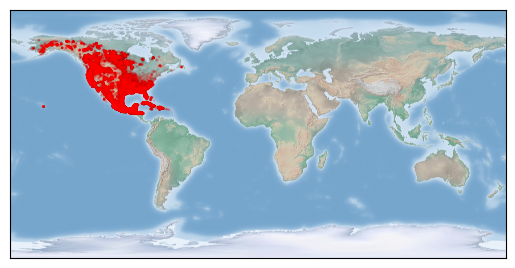

['NOAA 20' 'SUOMI NPP' 'GOES-EAST' 'MODIS TERRA' 'GOES-WEST']

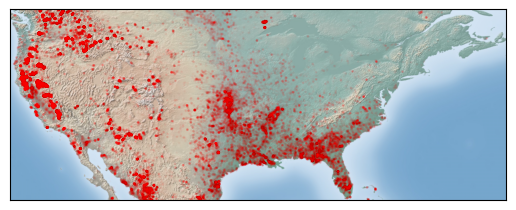

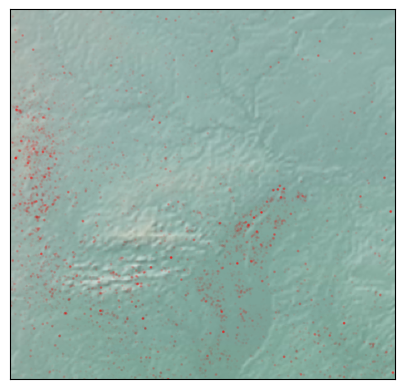

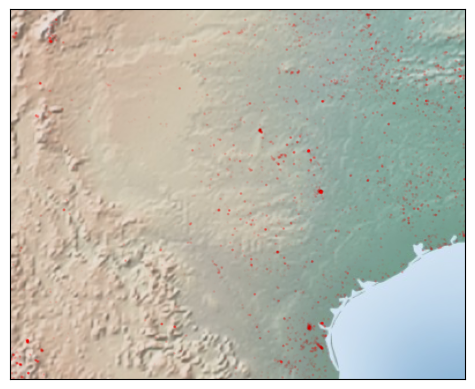

In [ ]:
import requests
import pandas as pd
from datetime import date, timedelta, datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import sys
import os
def eprint(*args, **kwargs):
    print(*args, file=sys.stderr, **kwargs)
'''
This Hazard Mapping System Fire Class is a managing tool
to download information from the main source: https://www.ospo.noaa.gov/Products/land/hms.html#about

'''
class HMSFire:
  def __init__(self, startDate:str, endDate:str, load_file:str=None, skipDays:int=0):
    self.startDate = startDate
    self.endDate = endDate
    if load_file != None:
      self.data = pd.read_csv(load_file, skipinitialspace=True)
      self.data = self.data[~data.duplicated()]
      self.data.columns = self.data.columns.str.replace(' ', '')
    else:
       self.data = self.adquire(startDate=startDate, endDate=endDate)
  def getDataFrame(self):
    return self.data

  def getXarray(self):
    return data.set_index('Time').to_xarray()

  def update(self, startDate:str, endDate:str):
    ##TODO: apply a smart update...
    self.data = self.adquire(startDate=startDate, endDate=endDate)

  def resamplingTime(self, data:pd.DataFrame(), freq:str='1D'):
    data2=data.copy()
    data2 = data2[data2.FRP > -999.0] ##remove missing values
    colsGroup = list(data2.columns)
    colsGroup.remove('Time')
    colsGroup.remove('FRP')
    data2 = data2.set_index(colsGroup+['Time'])
    cols = colsGroup + [pd.Grouper(freq=freq, level='Time')]
    return data2.groupby(cols)['FRP'].mean().reset_index(name='FRP')
  def getBoundingBoxCounty(self, county:str='Dallas'):
    boundingBox = pd.read_csv('US_County_Boundingboxes.csv')
    return boundingBox[boundingBox.COUNTY_NAME=='Dallas'].xmin.min(), boundingBox [boundingBox.COUNTY_NAME=='Dallas'].ymin.min(), boundingBox [boundingBox.COUNTY_NAME=='Dallas'].xmax.max(), boundingBox [boundingBox.COUNTY_NAME=='Dallas'].ymax.max()

  def getBoundingBoxState(self, state:str='Texas'):
    boundingBox = pd.read_csv('US_State_Bounding_Boxes.csv')
    box = boundingBox[boundingBox.NAME=='Texas'][['xmin', 'ymin', 'xmax', 'ymax']].values[0]
    return box[0], box[1], box[2], box[3]
  def adquire(self, startDate:str, endDate:str, skipDays:int=0):
    """
    In this method connects directly to official web page and adquires information of fires
    Warning: depending on the start and end dates affects directly to RAM 
    input: 
       startDate: format Year-Month-Day example 2008-10-01
       endDate: format Year-Month-Day example 2008-10-01
       skipDays: skip a number of days - 1, by default is 1, thus al data will be kept   
    output: 
      dataframe from Pandas library
    """
    start_date = datetime.strptime(startDate, '%Y-%m-%d')
    end_date = datetime.strptime(endDate, '%Y-%m-%d')
    delta = end_date - start_date
    df = None

    for i in range(0, delta.days+1, skipDays+1):
      YearMonthDay = start_date + timedelta(days=i)
      Year = YearMonthDay.strftime('%Y')
      Month = YearMonthDay.strftime('%m')
      Day = YearMonthDay.strftime('%d')
      url = 'https://satepsanone.nesdis.noaa.gov/pub/FIRE/web/HMS/Fire_Points/Text/'+Year+'/'+Month+'/hms_fire'+Year+Month+Day+'.txt'
      ##check if url exists
      response = requests.get(url)
      eprint("Downloading.... {:.2f} %".format(i*100.0/delta.days))
      if response.status_code != 200:
        continue
      dfinner = pd.read_csv(url, sep=",", encoding='latin-1', skipinitialspace=True)
      dfinner.columns = dfinner.columns.str.replace(' ', '')
      dfinner['Time'] = YearMonthDay
      if i == 0:
        df = dfinner
      else:
        df = pd.concat([df,dfinner])
    df = df[~df.duplicated()]
    return df

  def plot(self, minlon:int=-180, minlat:int=-90, maxlon:int=180, maxlat:int=90, points:pd.DataFrame=pd.DataFrame(), opacityCount:bool=True):
    data = self.data.copy()
    if not points.empty:
      data = points.copy()
    Lon = self.data.Lon
    Lat = self.data.Lat
    # setup Lambert Conformal basemap.
    #m = Basemap(width=12000000,height=9000000,projection='lcc',
    #            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
    m = Basemap(width=12000000,height=9000000,
            resolution='c',llcrnrlon=minlon,llcrnrlat=minlat, urcrnrlon=maxlon, urcrnrlat=maxlat)
    # draw coastlines.
    #m.drawcoastlines()
    # draw a boundary around the map, fill the background.
    # this background will end up being the ocean color, since
    # the continents will be drawn on top.
    #m.drawmapboundary(fill_color='aqua')
#    m.drawmapboundary(fill_color='#46bcec')
    m.shadedrelief()
    # fill continents, set lake color same as ocean color.
    #m.fillcontinents(color='coral',lake_color='aqua')
#    m.fillcontinents(color = 'white',lake_color='#46bcec')
    #m.scatter(-180-Lon.where(Lon.YearDay>2023050, drop=True).values, Lat.where(Lat.YearDay>2023050, drop=True).values, marker = 'o', color='r', zorder=1.)
    x, y = m(Lon.values, Lat.values)  # transform coordinates
    freq = [1]*len(x)
    if opacityCount:
      freq = data[['Lon', 'Lat']].groupby(['Lon', 'Lat']).size().reset_index(name='Count')['Count'].values
      freq = freq/freq.max()

    plt.scatter(x, y, 1, marker='o', color='Red', alpha=freq) 
    plt.show()# setup Lambert Conformal basemap.

  def satelites(self):
    return self.data.Satellite.unique()
HMSF = HMSFire(startDate='2020-01-01', endDate='2023-02-01')
data = HMSF.getDataFrame()
HMSF.plot()
print(HMSF.satelites())
HMSF.plot(minlon=-125, minlat=25, maxlon=-60, maxlat=50)
minlon, minlat, maxlon, maxlat = HMSF.getBoundingBoxCounty(county='Dallas')
HMSF.plot(minlon=minlon, minlat=minlat, maxlon=maxlon, maxlat=maxlat)
minlon, minlat, maxlon, maxlat = HMSF.getBoundingBoxState(state='Texas')
HMSF.plot(minlon=minlon, minlat=minlat, maxlon=maxlon, maxlat=maxlat)


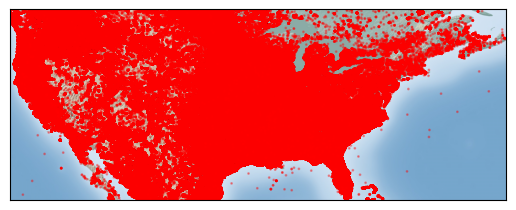

In [ ]:
HMSF.plot(points=data[data.Satellite=='NOAA 20'], minlon=-125, minlat=25, maxlon=-60, maxlat=50)

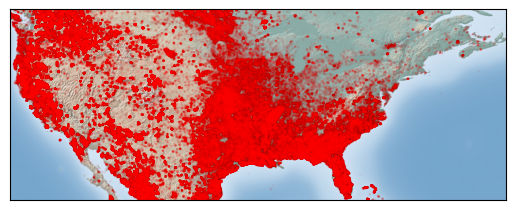

In [ ]:
HMSF.plot(points=data[data.Satellite=='GOES-EAST'], minlon=-125, minlat=25, maxlon=-60, maxlat=50)

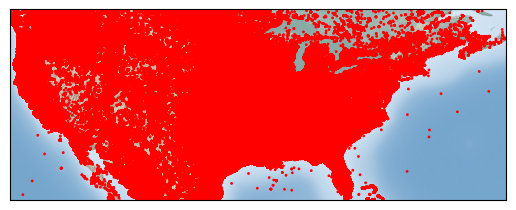

In [ ]:
HMSF.plot(points=data[data.Satellite=='GOES-EAST'], minlon=-125, minlat=25, maxlon=-60, maxlat=50, opacityCount=False)

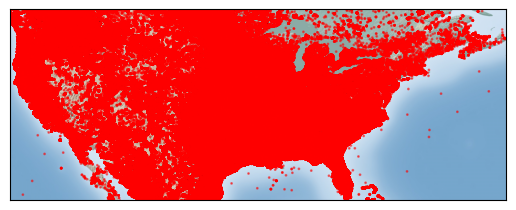

In [ ]:
HMSF.plot(points=data[data.Satellite=='SUOMI NPP'], minlon=-125, minlat=25, maxlon=-60, maxlat=50)

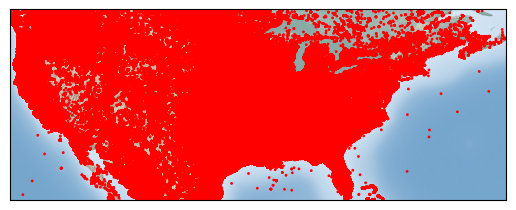

In [ ]:
HMSF.plot(points=data[(data.Satellite=='SUOMI NPP') & (data.YearDay==2023001)  ], minlon=-125, minlat=25, maxlon=-60, maxlat=50)

Text(0.5, 0.98, 'Fire Radiative Power (FRP)')

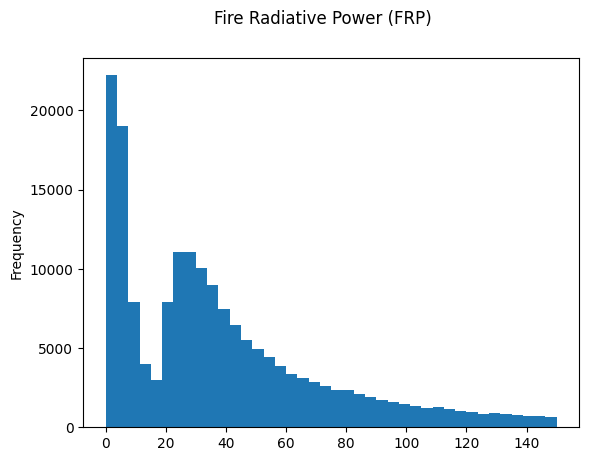

In [ ]:
data[(data.FRP>0) & (data.FRP<150) & (data.YearDay>2023000)].FRP.plot.hist(bins=40)
plt.suptitle("Fire Radiative Power (FRP)")

Time resampling averaging all FRPs values

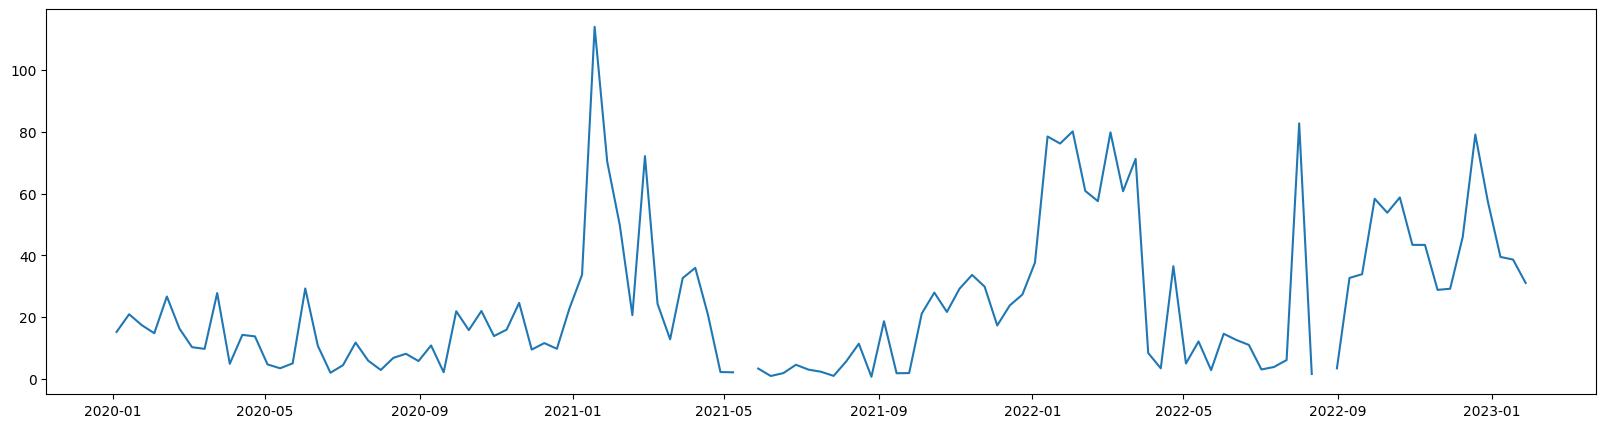

                  FRP
Time                 
2020-01-04  15.184362
2020-01-14  20.916477
2020-01-24  17.393123
2020-02-03  14.775521
2020-02-13  26.660439
...               ...
2022-12-19  79.111945
2022-12-29  57.344761
2023-01-08  39.471628
2023-01-18  38.624942
2023-01-28  31.038423

[113 rows x 1 columns]


In [ ]:
week_data = data[['FRP', 'Time']].where( (data.Lon>-94) & (data.Lon<-90) & (data.Lat>25) & (data.Lat<30) & (data.FRP>-999) ).resample('10D', on='Time').mean()
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(week_data)
plt.show()

In [ ]:
week_data

,FRP
Time,
2020-01-04,15.184362
2020-01-14,20.916477
2020-01-24,17.393123
2020-02-03,14.775521
2020-02-13,26.660439
...,...
2022-12-19,79.111945
2022-12-29,57.344761
2023-01-08,39.471628


In [ ]:
HMSF.resamplingTime(data=data[['Lon', 'Lat', 'YearDay', 'Satellite', 'Method', 'Ecosystem', 'Time', 'FRP']], freq='7D')

,Lon,Lat,YearDay,Satellite,Method,Ecosystem,Time,FRP
0,-169.973618,52.810310,2022194,NOAA 20,VIIRS,8,2022-07-13,4.464
1,-169.953979,52.822445,2020082,NOAA 20,VIIRS,53,2020-03-18,0.589
2,-169.947662,52.819252,2022183,SUOMI NPP,VIIRS,53,2022-06-29,9.437
3,-169.947632,52.823700,2021198,SUOMI NPP,VIIRS,53,2021-07-14,1.865
4,-169.947464,52.823151,2021141,NOAA 20,VIIRS,53,2021-05-19,0.591
...,...,...,...,...,...,...,...,...
7239249,-51.094212,69.234848,2020142,NOAA 20,VIIRS,53,2020-05-20,5.051
7239250,-51.089329,69.235504,2020142,NOAA 20,VIIRS,53,2020-05-20,2.318
7239251,-50.683819,66.996140,2022139,NOAA 20,VIIRS,53,2022-05-18,2.106
7239252,-50.446079,66.999184,2022200,MODIS TERRA,MODIS,53,2022-07-13,8.572


In [ ]:
HMSF.resamplingTime(data=data[['Lon', 'Lat', 'Time', 'FRP']], freq='7D')

,Lon,Lat,Time,FRP
0,-169.973618,52.810310,2022-07-13,4.464
1,-169.953979,52.822445,2020-03-18,0.589
2,-169.947662,52.819252,2022-06-29,9.437
3,-169.947632,52.823700,2021-07-14,1.865
4,-169.947464,52.823151,2021-05-19,0.591
...,...,...,...,...
7134341,-51.094212,69.234848,2020-05-20,5.051
7134342,-51.089329,69.235504,2020-05-20,2.318
7134343,-50.683819,66.996140,2022-05-18,2.106
7134344,-50.446079,66.999184,2022-07-13,8.572


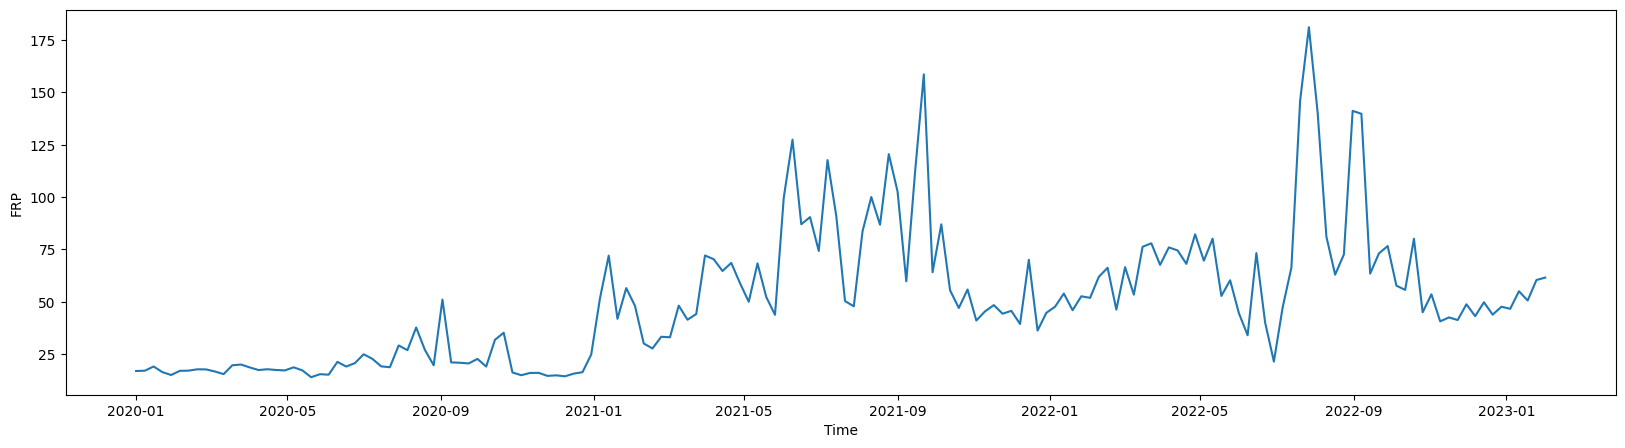

In [ ]:

timedata = HMSF.resamplingTime(data=data[['Time', 'FRP']], freq='7D')
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(timedata['Time'], timedata['FRP'])
plt.xlabel('Time')
plt.ylabel('FRP')
#plt.xticks(size = 7)
plt.show()

Work with xarray

In [ ]:
xrdata  = HMSF.getXarray()

In [ ]:
xrdata

<xarray.Dataset>
Dimensions:    (Time: 10152791)
Coordinates:
  * Time       (Time) datetime64[ns] 2020-01-01 2020-01-01 ... 2023-02-01
Data variables:
    Lon        (Time) float64 -81.48 -80.66 -80.3 -78.0 ... -92.19 -79.15 -75.98
    Lat        (Time) float64 34.16 34.65 34.67 36.1 ... 19.62 16.08 21.86 20.55
    YearDay    (Time) int64 2020001 2020001 2020001 ... 2023033 2023033 2023033
    Satellite  (Time) object 'NOAA 20' 'NOAA 20' ... 'GOES-EAST' 'GOES-EAST'
    Method     (Time) object 'VIIRS' 'VIIRS' 'VIIRS' ... 'FDC' 'FDC' 'FDC'
    Ecosystem  (Time) int64 27 27 31 24 25 13 93 93 ... 93 33 93 93 47 93 93 93
    FRP        (Time) float64 1.325 0.5 1.025 1.11 ... 41.08 65.9 20.62 23.83

In [ ]:
xrdata.where(xrdata.Lat>20, drop=True)  

NameError: ignored

Local dataset

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ECr4SK0CQ8OS46KLjVLD0271WMF3nYCz" -O data.txt && rm -rf /tmp/cookies.txt

--2023-03-28 00:07:36--  https://docs.google.com/uc?export=download&confirm=&id=1ECr4SK0CQ8OS46KLjVLD0271WMF3nYCz
Resolving docs.google.com (docs.google.com)... 108.177.119.100, 108.177.119.101, 108.177.119.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3miai3hat4agl4n1bt5r4adr8m671mup/1679962050000/04289866370616218628/*/1ECr4SK0CQ8OS46KLjVLD0271WMF3nYCz?e=download&uuid=5abd8514-19c6-4af1-82a5-23386b8d1e75 [following]
--2023-03-28 00:07:36--  https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3miai3hat4agl4n1bt5r4adr8m671mup/1679962050000/04289866370616218628/*/1ECr4SK0CQ8OS46KLjVLD0271WMF3nYCz?e=download&uuid=5abd8514-19c6-4af1-82a5-23386b8d1e75
Resolving doc-04-bk-docs.googleusercontent.com (doc-04-bk-docs.googleusercontent.com)... 142.250.145.1

(array([4.3171e+04, 1.1863e+04, 4.3420e+03, 1.9470e+03, 7.6100e+02,
        2.6400e+02, 6.1000e+01, 3.4000e+01, 5.0000e+00, 4.0000e+00]),
 array([1000.013 , 1880.7271, 2761.4412, 3642.1553, 4522.8694, 5403.5835,
        6284.2976, 7165.0117, 8045.7258, 8926.4399, 9807.154 ]),
 <BarContainer object of 10 artists>)

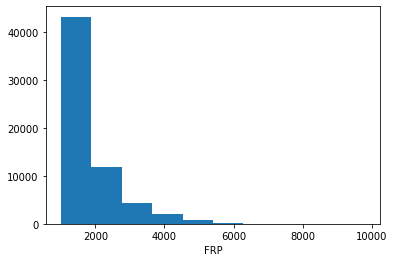

In [ ]:
ds.sel(Lon=slice(0,100), Lat=slice(0, 300), YearDay=slice(2015001, 2021001), FRP=slice(1000, 10000)).FRP.plot.hist()

In [ ]:
a = ds.sel(Lon=-180.1, Lat=-89.91, method='nearest').sel(FRP=slice(0, 1000)).isel(YearDay=slice(300, 8000)).mean(dim=('Satellite', 'Method','Ecosystem', 'Time', 'FRP'))

Source satellites

In [ ]:
a = ds.sel(FRP=slice(0, 1000)).isel(YearDay=slice(300, 8000)).mean(dim=('Lon', 'Lat', 'Satellite', 'Method','Ecosystem', 'Time', 'FRP'))

In [ ]:
!pip install HMSFire

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 22.1 MB/s eta 0:00:00
  Created wheel for HMSFire: filename=HMSFire-0.2-py3-none-any.whl size=1807 sha256=20f18341f7e277386b700ad2e37ae7aed6b6803e511f1450b6c6d31c765ca653
  Stored in directory: /root/.cache/pip/wheels/b4/04/01/159ab40056b9ab9bfed66a52cb9f0160e93816f2096a351e5b
Successfully built HMSFire


In [ ]:
from HMSF.

ModuleNotFoundError: ignored